**Mount Google Drive**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Install Dependencies**

In [0]:
!pip install emoji
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import emoji
from wordcloud import WordCloud
from functools import reduce
import matplotlib.pyplot as plt

     |████████████████████████████████| 51kB 1.9MB/s 
  Created wheel for emoji: filename=emoji-0.5.4-cp36-none-any.whl size=42176 sha256=49da1560b8a797731c0e4189201be0c78af51e672408e3d7d531638f2277cf96
  Stored in directory: /root/.cache/pip/wheels/2a/a9/0a/4f8e8cce8074232aba240caca3fade315bb49fac68808d1a9c
Successfully built emoji


**Function definitions**

In [0]:
def load_dict_contractions():
    
    return {
        "ain't":"is not",
        "amn't":"am not",
        "aren't":"are not",
        "can't":"cannot",
        "'cause":"because",
        "couldn't":"could not",
        "couldn't've":"could not have",
        "could've":"could have",
        "daren't":"dare not",
        "daresn't":"dare not",
        "dasn't":"dare not",
        "didn't":"did not",
        "doesn't":"does not",
        "don't":"do not",
        "e'er":"ever",
        "em":"them",
        "everyone's":"everyone is",
        "finna":"fixing to",
        "gimme":"give me",
        "gonna":"going to",
        "gon't":"go not",
        "gotta":"got to",
        "hadn't":"had not",
        "hasn't":"has not",
        "haven't":"have not",
        "he'd":"he would",
        "he'll":"he will",
        "he's":"he is",
        "he've":"he have",
        "how'd":"how would",
        "how'll":"how will",
        "how're":"how are",
        "how's":"how is",
        "I'd":"I would",
        "I'll":"I will",
        "I'm":"I am",
        "I'm'a":"I am about to",
        "I'm'o":"I am going to",
        "isn't":"is not",
        "it'd":"it would",
        "it'll":"it will",
        "it's":"it is",
        "I've":"I have",
        "kinda":"kind of",
        "let's":"let us",
        "mayn't":"may not",
        "may've":"may have",
        "mightn't":"might not",
        "might've":"might have",
        "mustn't":"must not",
        "mustn't've":"must not have",
        "must've":"must have",
        "needn't":"need not",
        "ne'er":"never",
        "o'":"of",
        "o'er":"over",
        "ol'":"old",
        "oughtn't":"ought not",
        "shalln't":"shall not",
        "shan't":"shall not",
        "she'd":"she would",
        "she'll":"she will",
        "she's":"she is",
        "shouldn't":"should not",
        "shouldn't've":"should not have",
        "should've":"should have",
        "somebody's":"somebody is",
        "someone's":"someone is",
        "something's":"something is",
        "that'd":"that would",
        "that'll":"that will",
        "that're":"that are",
        "that's":"that is",
        "there'd":"there would",
        "there'll":"there will",
        "there're":"there are",
        "there's":"there is",
        "these're":"these are",
        "they'd":"they would",
        "they'll":"they will",
        "they're":"they are",
        "they've":"they have",
        "this's":"this is",
        "those're":"those are",
        "'tis":"it is",
        "'twas":"it was",
        "wanna":"want to",
        "wasn't":"was not",
        "we'd":"we would",
        "we'd've":"we would have",
        "we'll":"we will",
        "we're":"we are",
        "weren't":"were not",
        "we've":"we have",
        "what'd":"what did",
        "what'll":"what will",
        "what're":"what are",
        "what's":"what is",
        "what've":"what have",
        "when's":"when is",
        "where'd":"where did",
        "where're":"where are",
        "where's":"where is",
        "where've":"where have",
        "which's":"which is",
        "who'd":"who would",
        "who'd've":"who would have",
        "who'll":"who will",
        "who're":"who are",
        "who's":"who is",
        "who've":"who have",
        "why'd":"why did",
        "why're":"why are",
        "why's":"why is",
        "won't":"will not",
        "wouldn't":"would not",
        "would've":"would have",
        "y'all":"you all",
        "you'd":"you would",
        "you'll":"you will",
        "you're":"you are",
        "you've":"you have",
        "Whatcha":"What are you",
        "luv":"love",
        "sux":"sucks"
        }

# emoticons
def load_dict_smileys():
    
    return {
        ":-)":"happy smiley",
        ":-]":"happy smiley",
        ":-3":"happy smiley",
        ":->":"happy smiley",
        "8-)":"happy smiley",
        ":-}":"happy smiley",
        ":)":"happy smiley",
        ":]":"happy smiley",
        ":3":"happy smiley",
        ":>":"happy smiley",
        "8)":"happy smiley",
        ":}":"happy smiley",
        ":o)":"happy smiley",
        ":c)":"happy smiley",
        ":^)":"happy smiley",
        "=]":"happy smiley",
        "=)":"happy smiley",
        ":-))":"happy smiley",
        ":-D":"happy smiley",
        "8-D":"happy smiley",
        "x-D":"happy smiley",
        "X-D":"happy smiley",
        ":D":"happy smiley",
        "8D":"happy smiley",
        "xD":"happy smiley",
        "XD":"happy smiley",
        ":-(":"sad smiley",
        ":-c":"sad smiley",
        ":-<":"sad smiley",
        ":-[":"sad smiley",
        ":(":"sad smiley",
        ":c":"sad smiley",
        ":<":"sad smiley",
        ":[":"sad smiley",
        ":-||":"sad smiley",
        ">:[":"sad smiley",
        ":{":"sad smiley",
        ":@":"sad smiley",
        ">:(":"sad smiley",
        ":'-(":"sad smiley",
        ":'(":"sad smiley",
        ":-P":"playful smiley",
        "X-P":"playful smiley",
        "x-p":"playful smiley",
        ":-p":"playful smiley",
        ":-Þ":"playful smiley",
        ":-þ":"playful smiley",
        ":-b":"playful smiley",
        ":P":"playful smiley",
        "XP":"playful smiley",
        "xp":"playful smiley",
        ":p":"playful smiley",
        ":Þ":"playful smiley",
        ":þ":"playful smiley",
        ":b":"playful smiley",
        "<3":"love"
        }

def generate_sentiment_polarity(text):
  blob = TextBlob(text)
  return blob.sentiment.polarity

def generate_sentiment_subjectivity(text):
  blob = TextBlob(text)
  return blob.sentiment.subjectivity  

def clean(x):
 x = re.sub(r'^RT[\s]+','',x)
 x = re.sub(r'https?:\/\/.*[\r\n]*', '', x)
 x = re.sub(r'#', '', x)
 x = re.sub(r'@[A-Za-z0–9]+', '', x) 
 return x

def replace_contractions(tweet):
  CONTRACTIONS = load_dict_contractions()
  tweet = tweet.replace("’","'")
  words = tweet.split()
  reformed = [CONTRACTIONS[word] if word in CONTRACTIONS else word for word in words]
  tweet = " ".join(reformed) 
  return tweet

def replace_smileys(tweet):
  SMILEY = load_dict_smileys()  
  words = tweet.split()
  reformed = [SMILEY[word] if word in SMILEY else word for word in words]
  tweet = " ".join(reformed)
  return tweet

def translate_emojis(text_with_emoji):
  return emoji.demojize(text_with_emoji).replace(":","").replace("_face","")

def convert_timestamp(x):
  return pd.to_datetime(x,unit='s')

def convert_timestamp_to_data(x):
  return pd.to_date(x,unit='s')


def convert_timestamp_to_date(x):
  return pd.to_datetime(x, unit='s', errors='ignore').date().strftime('%Y-%m-%d')

def clean_and_analyze_tweets(path):
  tweet_csv = pd.read_csv(path);
  tweet_csv.tweet_text
  df = pd.DataFrame(tweet_csv)
  df['tweet_text'] = df['tweet_text'].apply(clean)
  df['tweet_text'] = df['tweet_text'].apply(replace_contractions)
  df['tweet_text'] = df['tweet_text'].apply(replace_smileys)
  df['tweet_text'] = df['tweet_text'].apply(translate_emojis)
  df['polarity'] = df['tweet_text'].apply(generate_sentiment_polarity)
  df['subjectivity'] = df['tweet_text'].apply(generate_sentiment_subjectivity)
  df['tweet_created_at_ts'] = df['tweet_created_at_ts'].apply(convert_timestamp)
  df['tweet_created_at_date'] = df['tweet_created_at_ts'].apply(convert_timestamp_to_date)
  return df

def append_max_weather_category(weather_data):
  wd = weather_data[weather_data.columns[3:9]]
  max_weather = pd.DataFrame(wd).idxmax(axis=1)
  max_weather = pd.DataFrame(max_weather, columns=['weather'])
  max_weather['date'] = weather_data['date']
  return max_weather

def apply_sentiment_category(row):
  if row['polarity'] < 0:
    return 'negative'
  elif row['polarity'] > 0:
    return 'positive'
  else:
    return 'neutral'

def append(x1, x2): 
    return x1 +' ' + x2


**Combining data for all the months**

In [0]:
df_jan = clean_and_analyze_tweets('/content/drive/My Drive/Text-Analytics-Data/twitter_201801_country_ie_userlocation_ireland.csv')
df_feb = clean_and_analyze_tweets('/content/drive/My Drive/Text-Analytics-Data/twitter_201802_country_ie_userlocation_ireland.csv')
df_mar = clean_and_analyze_tweets('/content/drive/My Drive/Text-Analytics-Data/twitter_201803_country_ie_userlocation_ireland.csv')
df_apr = clean_and_analyze_tweets('/content/drive/My Drive/Text-Analytics-Data/twitter_201804_country_ie_userlocation_ireland.csv')
df_may = clean_and_analyze_tweets('/content/drive/My Drive/Text-Analytics-Data/twitter_201805_country_ie_userlocation_ireland.csv')
df_jun = clean_and_analyze_tweets('/content/drive/My Drive/Text-Analytics-Data/twitter_201806_country_ie_userlocation_ireland.csv')
df_jul = clean_and_analyze_tweets('/content/drive/My Drive/Text-Analytics-Data/twitter_201807_country_ie_userlocation_ireland.csv')
df_aug = clean_and_analyze_tweets('/content/drive/My Drive/Text-Analytics-Data/twitter_201808_country_ie_userlocation_ireland.csv')
df_sept = clean_and_analyze_tweets('/content/drive/My Drive/Text-Analytics-Data/twitter_201809_country_ie_userlocation_ireland.csv')
df_oct = clean_and_analyze_tweets('/content/drive/My Drive/Text-Analytics-Data/twitter_201810_country_ie_userlocation_ireland.csv')
df_nov = clean_and_analyze_tweets('/content/drive/My Drive/Text-Analytics-Data/twitter_201811_country_ie_userlocation_ireland.csv')
df_dec = clean_and_analyze_tweets('/content/drive/My Drive/Text-Analytics-Data/twitter_201812_country_ie_userlocation_ireland.csv')

combined_data = df_jan.append(df_feb).append(df_mar).append(df_apr).append(df_may).append(df_jun).append(df_jul).append(df_aug).append(df_sept).append(df_oct).append(df_nov).append(df_dec)


In [0]:
combined_data['week'] = pd.to_datetime(combined_data['tweet_created_at_ts']).dt.dayofweek
combined_data['week'].unique()

import plotly.express as px

fig = px.box(combined_data, x='week', y='polarity', points="all")


fig.update_layout(
    title="Sentiment Analysis of the tweets on weekdays and weekends",
    xaxis_title="Weekday (Monday=0, Sunday=6)",
    yaxis_title="Sentiment")

fig.show()

In [0]:
weekly_data = combined_data
weekly_data['sentiment_category'] = weekly_data.apply(lambda row: apply_sentiment_category(row), axis=1)

weekly_grouped_data = weekly_data.groupby(['sentiment_category', 'week']).count()['tweet_id']

import plotly.graph_objects as go

weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

fig = go.Figure()
fig.add_trace(go.Bar(
    x=weekdays,
    y=weekly_grouped_data[14:21],
    name='Positive',
    marker_color='mediumseagreen',
    text=weekly_grouped_data[14:21] 
))
fig.add_trace(go.Bar(
    x=weekdays,
    y=weekly_grouped_data[0:7],
    name='Negative',
    marker_color='indianred',
    text=weekly_grouped_data[0:7]
))
fig.add_trace(go.Bar(
    x=weekdays,
    y=weekly_grouped_data[7:14],
    name='Neutral',
    marker_color='lightsalmon',
    text=weekly_grouped_data[7:14]
))
fig.update_traces(texttemplate='%{text}', textposition='outside')

fig.update_layout(barmode='group',
                  xaxis_title="Weather Category",
                  yaxis_title="Number of tweets")
fig.show()

In [0]:
import plotly.graph_objects as go
x = combined_data['week']

fig = go.Figure()
fig.add_trace(go.Bar(x=x, 
                     y=combined_data[combined_data['polarity'] > 0].count(),
                     name="Positive sentiment" ))
fig.add_trace(go.Bar(x=x, 
                     y=combined_data[combined_data['polarity'] < 0].count(),
                     name="Negative senitiment"))

fig.update_layout(title_text='Number of positive and negative tweets grouped by seasons')
fig.show()

In [0]:
import plotly.express as px

fig = px.box(combined_data, x='tweet_place_country_code', y='polarity', points="all")


fig.update_layout(
    title="Sentiment Analysis of the tweets for the month of Jul 2018",
    xaxis_title="",
    yaxis_title="Sentiment")

fig.show()

**WordCloud**

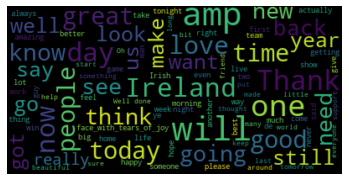

In [0]:
from wordcloud import WordCloud
from functools import reduce
 
def append(x1, x2): 
    return x1 +' ' + x2

combined_text = reduce(append, weekly_data.tweet_text)

wordcloud = WordCloud().generate(combined_text)



import matplotlib.pyplot as plt

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(combined_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


**All Seasons Combined**

In [0]:

combined_winter = df_dec.append(df_jan).append(df_feb)
combined_winter = combined_winter.assign(season='winter')
combined_winter
combined_spring = df_mar.append(df_apr).append(df_may)
combined_spring = combined_spring.assign(season='spring')
combined_spring

combined_summer = df_jun.append(df_jul).append(df_aug)
combined_summer = combined_summer.assign(season='summer')
combined_summer

combined_fall = df_sept.append(df_oct).append(df_nov)
combined_fall = combined_fall.assign(season='fall')
combined_fall

all_season = combined_winter.append(combined_spring, sort=False).append(combined_summer, sort=False).append(combined_fall, sort=False)


**All Seasons box plot**

In [0]:
import plotly.express as px 

fig = px.box(all_season, x='season', y='polarity', points="all")


fig.update_layout(
    title="Sentiment Analysis of the tweets for all seasons in 2018",
    xaxis_title="Seasons",
    yaxis_title="Sentiment")

fig.show()

**Positive Negative Sentiments Grouped by Seasons**

In [0]:
import plotly.graph_objects as go
x = ["spring", "summer", "winter","fall"]

fig = go.Figure()
fig.add_trace(go.Bar(x=x, 
                     y=[combined_spring[combined_spring['polarity'] > 0].count().tweet_id, 
                        combined_summer[combined_summer['polarity'] > 0].count().tweet_id, 
                        combined_winter[combined_winter['polarity'] > 0].count().tweet_id,
                        combined_fall[combined_fall['polarity'] > 0].count().tweet_id],
                     text=[combined_spring[combined_spring['polarity'] > 0].count().tweet_id, 
                        combined_summer[combined_summer['polarity'] > 0].count().tweet_id, 
                        combined_winter[combined_winter['polarity'] > 0].count().tweet_id,
                        combined_fall[combined_fall['polarity'] > 0].count().tweet_id],
                     marker_color='mediumseagreen',
                     name="Positive sentiment" ))
fig.add_trace(go.Bar(x=x, 
                     y=[combined_spring[combined_spring['polarity'] < 0].count().tweet_id,
                        combined_summer[combined_summer['polarity'] < 0].count().tweet_id, 
                        combined_winter[combined_winter['polarity'] < 0].count().tweet_id,
                      combined_fall[combined_fall['polarity'] < 0].count().tweet_id],
                     text=[combined_spring[combined_spring['polarity'] < 0].count().tweet_id,
                        combined_summer[combined_summer['polarity'] < 0].count().tweet_id, 
                        combined_winter[combined_winter['polarity'] < 0].count().tweet_id,
                      combined_fall[combined_fall['polarity'] < 0].count().tweet_id],
                     marker_color='indianred',
                     name="Negative senitiment"))
fig.add_trace(go.Bar(x=x, 
                     y=[combined_spring[combined_spring['polarity'] == 0].count().tweet_id,
                        combined_summer[combined_summer['polarity'] == 0].count().tweet_id, 
                        combined_winter[combined_winter['polarity'] == 0].count().tweet_id,
                      combined_fall[combined_fall['polarity'] == 0].count().tweet_id],
                     text=[combined_spring[combined_spring['polarity'] == 0].count().tweet_id,
                        combined_summer[combined_summer['polarity'] == 0].count().tweet_id, 
                        combined_winter[combined_winter['polarity'] == 0].count().tweet_id,
                      combined_fall[combined_fall['polarity'] == 0].count().tweet_id],
                     marker_color='lightsalmon',
                     name="Neutral senitiment"))

fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(title_text='Number of positive and negative tweets grouped by seasons')
fig.show()

**Combining Weather data with Tweets**

In [0]:
weather_data = pd.read_csv('/content/drive/My Drive/Text-Analytics-Data/forecasts_with_features.csv')
weather_data_combined = pd.merge(combined_data, append_max_weather_category(weather_data), left_on='tweet_created_at_date', right_on='date')


**Plot Bar graph of positive negative tweets**

In [0]:
weather_data_combined['sentiment_category'] = weather_data_combined.apply(lambda row: apply_sentiment_category(row), axis=1)
grouped_data = weather_data_combined.groupby(['sentiment_category', 'weather']).count()
barplot_data = grouped_data['tweet_id']
barplot_data[8:12]

import plotly.graph_objects as go

weather_types = ['COLD', 'DRY', 'HOT', 'WET','CLOUDY', 'WINDY']

fig = go.Figure()
fig.add_trace(go.Bar(
    x=weather_types,
    y=barplot_data[12:18],
    name='Positive',
    marker_color='mediumseagreen',
    text=barplot_data[12:18] 
))
fig.add_trace(go.Bar(
    x=weather_types,
    y=barplot_data[0:6],
    name='Negative',
    marker_color='indianred',
    text=barplot_data[0:6]
))
fig.add_trace(go.Bar(
    x=weather_types,
    y=barplot_data[6:12],
    name='Neutral',
    marker_color='lightsalmon',
    text=barplot_data[6:12]
))
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(barmode='group',
                  xaxis_title="Weather Category",
                  yaxis_title="Number of tweets")
fig.show()

**Distribution of sentiments of tweets in all kinds of weather categories**

In [0]:
import plotly.express as px
from plotly.subplots import make_subplots

weather_data_combined['sentiment_category'] = weather_data_combined.apply(lambda row: apply_sentiment_category(row), axis=1)
grouped_data = weather_data_combined.groupby(['sentiment_category', 'weather']).count()
barplot_data = grouped_data['tweet_id']

colors = ['mediumseagreen', 'lightsalmon', 'indianred']
sentiment = ['Positive', 'Neutral', 'Negative']

fig = make_subplots(rows=2, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}],[{'type':'domain'},{'type':'domain'},{'type':'domain'}]], subplot_titles=weather_types)

fig.add_trace(go.Pie(labels=sentiment,
                             values=[barplot_data[0],barplot_data[6],barplot_data[12]]),1,1)
fig.add_trace(go.Pie(labels=sentiment,
                             values=[barplot_data[1],barplot_data[7],barplot_data[13]]),1,2)
fig.add_trace(go.Pie(labels=sentiment,
                             values=[barplot_data[2],barplot_data[8],barplot_data[14]]),1,3)
fig.add_trace(go.Pie(labels=sentiment,
                             values=[barplot_data[3],barplot_data[9],barplot_data[15]]),2,1)
fig.add_trace(go.Pie(labels=sentiment,
                             values=[barplot_data[4],barplot_data[10],barplot_data[16]]),2,2)
fig.add_trace(go.Pie(labels=sentiment,
                             values=[barplot_data[5],barplot_data[11],barplot_data[17]]),2,3)
fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()


 **Word Cloud Analysis for positive and negative sentiments**

In [0]:
positive_tweet_dataframe = combined_data[combined_data['polarity'] > 0]
negative_tweet_dataframe = combined_data[combined_data['polarity'] < 0]
neutral_tweet_dataframe = combined_data[combined_data['polarity'] == 0]

**Positive Tweets WordCloud**

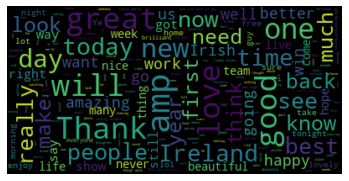

In [0]:

combined_text = reduce(append, positive_tweet_dataframe.tweet_text)

wordcloud = WordCloud().generate(combined_text)

wordcloud = WordCloud(max_font_size=40).generate(combined_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


**Negative Tweets WordCloud**

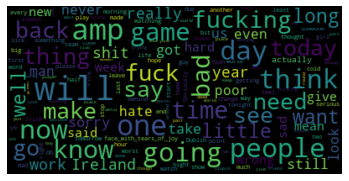

In [0]:

combined_text = reduce(append, negative_tweet_dataframe.tweet_text)

wordcloud = WordCloud().generate(combined_text)

wordcloud = WordCloud(max_font_size=40).generate(combined_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


**Neutral Tweets WordCloud**

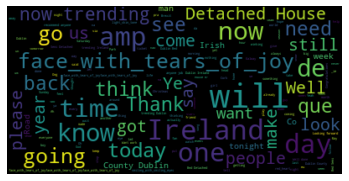

In [0]:

combined_text = reduce(append, neutral_tweet_dataframe.tweet_text)

wordcloud = WordCloud().generate(combined_text)

wordcloud = WordCloud(max_font_size=40).generate(combined_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off") 
plt.show()


Statistical Significance of effects of weather features on sentiment
See:

https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

In [0]:
from scipy import stats
wdf = pd.merge(combined_data, weather_data, left_on='tweet_created_at_date', right_on='date')
wdf.describe()
 

,tweet_id,polarity,subjectivity,week,COLD,HOT,WET,DRY,CLOUDY,WINDY
count,2.514600e+04,25146.000000,25146.000000,25146.000000,25146.000000,25146.000000,25146.000000,25146.000000,25146.000000,25146.000000
mean,1.005331e+18,0.115483,0.323833,2.988388,0.854331,0.168894,2.316313,0.185278,0.910125,1.715740
std,4.084924e+16,0.303475,0.337061,1.960341,1.575557,0.441968,2.126578,0.432512,0.951245,1.838608
min,9.479133e+17,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.681098e+17,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,9.930000e+17,0.000000,0.266667,3.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000
75%,1.046115e+18,0.250000,0.600000,5.000000,1.000000,0.000000,3.000000,0.000000,1.000000,2.000000
max,1.078802e+18,1.000000,1.000000,6.000000,11.000000,3.000000,11.000000,3.000000,5.000000,14.000000


In [0]:
rdf = pd.DataFrame(columns=['x', 'y', 'count(y)>0', 'spearman-r', 'p'])
rdf = rdf.append(pd.Series(['polarity', 'COLD', len(wdf.query('COLD > 0')), *stats.spearmanr(wdf['polarity'], wdf['COLD'])], index=rdf.columns), ignore_index=True)
rdf = rdf.append(pd.Series(['polarity','HOT', len(wdf.query('HOT > 0')), *stats.spearmanr(wdf['polarity'], wdf['HOT'])], index=rdf.columns), ignore_index=True)
rdf = rdf.append(pd.Series(['polarity','WET', len(wdf.query('WET > 0')), *stats.spearmanr(wdf['polarity'], wdf['WET'])], index=rdf.columns), ignore_index=True)
rdf = rdf.append(pd.Series(['polarity','DRY', len(wdf.query('DRY > 0')), *stats.spearmanr(wdf['polarity'], wdf['DRY'])], index=rdf.columns), ignore_index=True)
rdf = rdf.append(pd.Series(['polarity','CLOUDY', len(wdf.query('CLOUDY > 0')), *stats.spearmanr(wdf['polarity'], wdf['CLOUDY'])], index=rdf.columns), ignore_index=True)
rdf = rdf.append(pd.Series(['polarity','WINDY', len(wdf.query('WINDY > 0')), *stats.spearmanr(wdf['polarity'], wdf['WINDY'])], index=rdf.columns), ignore_index=True)
rdf = rdf.append(pd.Series(['subjectivity', 'COLD', len(wdf.query('COLD > 0')), *stats.spearmanr(wdf['subjectivity'], wdf['COLD'])], index=rdf.columns), ignore_index=True)
rdf = rdf.append(pd.Series(['subjectivity','HOT', len(wdf.query('HOT > 0')), *stats.spearmanr(wdf['subjectivity'], wdf['HOT'])], index=rdf.columns), ignore_index=True)
rdf = rdf.append(pd.Series(['subjectivity','WET', len(wdf.query('WET > 0')), *stats.spearmanr(wdf['subjectivity'], wdf['WET'])], index=rdf.columns), ignore_index=True)
rdf = rdf.append(pd.Series(['subjectivity','DRY', len(wdf.query('DRY > 0')), *stats.spearmanr(wdf['subjectivity'], wdf['DRY'])], index=rdf.columns), ignore_index=True)
rdf = rdf.append(pd.Series(['subjectivity','CLOUDY', len(wdf.query('CLOUDY > 0')), *stats.spearmanr(wdf['subjectivity'], wdf['CLOUDY'])], index=rdf.columns), ignore_index=True)
rdf = rdf.append(pd.Series(['subjectivity','WINDY', len(wdf.query('WINDY > 0')), *stats.spearmanr(wdf['subjectivity'], wdf['WINDY'])], index=rdf.columns), ignore_index=True)
rdf

,x,y,count(y)>0,spearman-r,p
0,polarity,COLD,9697,0.010104,0.109106
1,polarity,HOT,3606,-0.001039,0.869186
2,polarity,WET,21877,-0.005243,0.405785
3,polarity,DRY,4290,0.002549,0.686111
4,polarity,CLOUDY,15976,0.012755,0.043122
5,polarity,WINDY,18456,-0.007717,0.221079
6,subjectivity,COLD,9697,0.005246,0.405521
7,subjectivity,HOT,3606,-0.000501,0.936691
8,subjectivity,WET,21877,-0.007408,0.240107
9,subjectivity,DRY,4290,-0.002088,0.740532


In [0]:
rdf2 = pd.DataFrame(columns=['x', 'y', 'count(y)>0', 'pearson-r', 'p'])
rdf2 = rdf2.append(pd.Series(['polarity', 'COLD', len(wdf.query('COLD > 0')), *stats.pearsonr(wdf['polarity'], wdf['COLD'])], index=rdf2.columns), ignore_index=True)
rdf2 = rdf2.append(pd.Series(['polarity','HOT', len(wdf.query('HOT > 0')), *stats.pearsonr(wdf['polarity'], wdf['HOT'])], index=rdf2.columns), ignore_index=True)
rdf2 = rdf2.append(pd.Series(['polarity','WET', len(wdf.query('WET > 0')), *stats.pearsonr(wdf['polarity'], wdf['WET'])], index=rdf2.columns), ignore_index=True)
rdf2 = rdf2.append(pd.Series(['polarity','DRY', len(wdf.query('DRY > 0')), *stats.pearsonr(wdf['polarity'], wdf['DRY'])], index=rdf2.columns), ignore_index=True)
rdf2 = rdf2.append(pd.Series(['polarity','CLOUDY', len(wdf.query('CLOUDY > 0')), *stats.pearsonr(wdf['polarity'], wdf['CLOUDY'])], index=rdf2.columns), ignore_index=True)
rdf2 = rdf2.append(pd.Series(['polarity','WINDY', len(wdf.query('WINDY > 0')), *stats.pearsonr(wdf['polarity'], wdf['WINDY'])], index=rdf2.columns), ignore_index=True)
rdf2

,x,y,count(y)>0,pearson-r,p
0,polarity,COLD,9697,-0.001204,0.848559
1,polarity,HOT,3606,0.000398,0.949626
2,polarity,WET,21877,-0.006822,0.279343
3,polarity,DRY,4290,0.004532,0.472397
4,polarity,CLOUDY,15976,0.019195,0.002335
5,polarity,WINDY,18456,-0.009751,0.122033


In [0]:
import matplotlib.pyplot as plt
corr = wdf[['polarity', 'subjectivity', 'COLD', 'HOT', 'WET', 'DRY', 'CLOUDY', 'WINDY']].corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,polarity,subjectivity,COLD,HOT,WET,DRY,CLOUDY,WINDY
polarity,1.00,0.42,0.01,-0.00,-0.01,0.00,0.01,-0.01
subjectivity,0.42,1.00,0.01,-0.00,-0.01,-0.00,0.01,0.00
COLD,0.01,0.01,1.00,-0.27,0.35,0.18,-0.15,0.25
HOT,-0.00,-0.00,-0.27,1.00,-0.27,-0.08,0.12,-0.09
WET,-0.01,-0.01,0.35,-0.27,1.00,0.01,-0.28,0.33
DRY,0.00,-0.00,0.18,-0.08,0.01,1.00,0.03,0.12
CLOUDY,0.01,0.01,-0.15,0.12,-0.28,0.03,1.00,-0.23
WINDY,-0.01,0.00,0.25,-0.09,0.33,0.12,-0.23,1.00


In [0]:

stats.spearmanr(wdf['COLD'], wdf['WET'])

SpearmanrResult(correlation=0.3492200454240721, pvalue=0.0)

In [0]:

stats.spearmanr(wdf['COLD'], wdf['WET'])

SpearmanrResult(correlation=0.3492200454240721, pvalue=0.0)